In [88]:
import pandas as pd
import json
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

# Part3

In [278]:
def json_to_df(filename):
    data = json.load(open(filename, 'r'))
    columns = defaultdict(list)
    for entry in data:
        for col in entry:
            columns[col].append(entry[col])
    df = pd.DataFrame(columns)
    return df

In [279]:
filename = 'ultimate_data_challenge.json'
df = json_to_df(filename)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [249]:
# missing data for 
miss_avg_rating_of_driver = 50000 - 41878
miss_phone = 50000 - 49604
miss_avg_rating_by_driver = 50000 - 49799


In [248]:
dfa = df.loc[df['last_trip_date']>'2014-06-01']
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18310 entries, 0 to 49995
Data columns (total 12 columns):
city                      18310 non-null object
trips_in_first_30_days    18310 non-null int64
signup_date               18310 non-null object
avg_rating_of_driver      16742 non-null float64
avg_surge                 18310 non-null float64
last_trip_date            18310 non-null object
phone                     18180 non-null object
surge_pct                 18310 non-null float64
ultimate_black_user       18310 non-null bool
weekday_pct               18310 non-null float64
avg_dist                  18310 non-null float64
avg_rating_by_driver      18276 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 1.7+ MB


In [251]:
a_miss_avg_rating_of_driver = 18310 - 16742
a_miss_phone = 18310 - 18180
a_miss_avg_rating_by_driver = 18310 - 18276

In [253]:
print('missing data for avg_rating_of_driver:',miss_avg_rating_of_driver)
print('missing data for phone:',miss_phone)
print('missing data for miss_avg_rating_by_driver:', miss_avg_rating_by_driver)

print('dif of avg_rating_of_driver:', a_miss_avg_rating_of_driver-miss_avg_rating_of_driver)
print('dif of phone:', a_miss_phone - miss_phone)
print('dif of miss_avg_rating_by_driver:',a_miss_avg_rating_by_driver - miss_avg_rating_by_driver)

missing data for avg_rating_of_driver: 8122
missing data for phone: 396
missing data for miss_avg_rating_by_driver: 201
dif of avg_rating_of_driver: -6554
dif of phone: -266
dif of miss_avg_rating_by_driver: -167


In [281]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])


In [282]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [316]:
df['active_time'] = (df['last_trip_date'] - df['signup_date'])/86400000000000 # conver to days

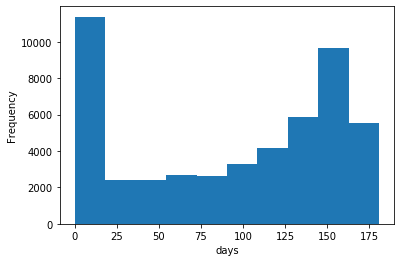

In [322]:
df['active_time'] = df['active_time'].astype('int')
df['active_time'].dropna().plot(kind='hist')
_=plt.xlabel('days')

## Modeling with active time as attributes

In [323]:
dfdummy = pd.get_dummies(df.drop(['last_trip_date','signup_date'],axis=1))
dfdummy.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_time,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,143,0,1,0,0,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,96,1,0,0,1,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,1,1,0,0,0,1
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,170,0,1,0,0,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,47,0,0,1,1,0


In [232]:
from collections import Counter
import numpy as np
c = Counter(df['last_trip_date'].sort_values())


In [239]:
x = list(map(lambda x: x[-4:], list(c.keys())))

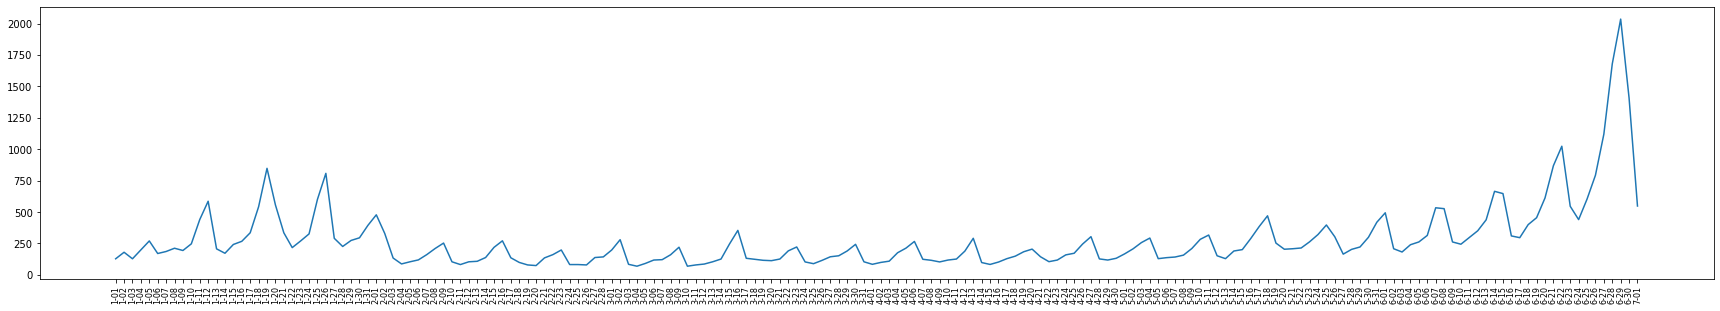

In [243]:
fig = plt.figure(figsize=(30,5))
plt.plot(x,list(c.values()))
_=plt.xticks(rotation='vertical',fontsize=8)

In [155]:
active = df['last_trip_date'].apply(lambda x: x > '2014-06-01')

In [156]:
active.sum(),active.sum()/df.shape[0]

(18310, 0.3662)

In [157]:
from xgboost import XGBClassifier

In [158]:
from sklearn.model_selection import train_test_split

In [324]:
X_train,X_test,y_train,y_test = train_test_split(dfdummy,active, test_size = 0.3,random_state = 0)

In [325]:
clf = XGBClassifier(max_depth=5)

clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [326]:
clf.score(X_train, y_train)

0.9659428571428571

In [327]:
clf.score(X_test,y_test)

0.9616666666666667

In [328]:
y_pred = clf.predict(X_test)

In [176]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [329]:
c = confusion_matrix(y_test, y_pred)
c

array([[9155,  392],
       [ 183, 5270]])

In [331]:
TN = c[0][0]
TP = c[1][1]
FP = c[1][0]
FN = c[0][1]

precision = TP/(TP+FP)
recall = TP/(TP+FN)

f1 = 2*precision*recall/(precision+recall)
f1

0.9482681061628431

In [330]:
f1_score(y_test,y_pred)

0.9482681061628431

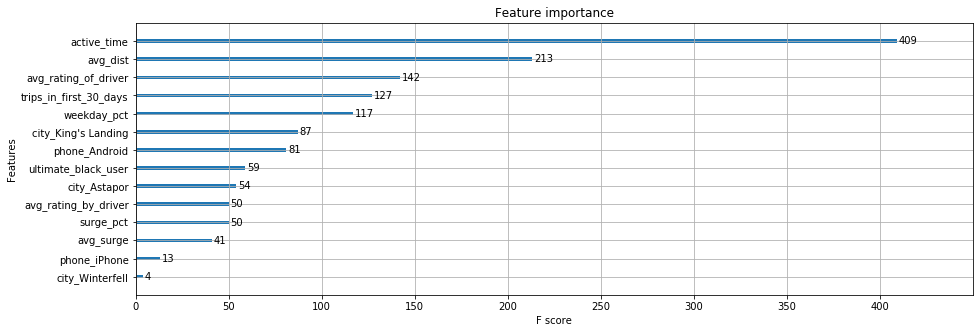

In [332]:
from xgboost import plot_importance
fig,ax = plt.subplots(1,1,figsize=(15,5))
plot_importance(clf,ax=ax)

## model without active time

In [334]:

clf = XGBClassifier(max_depth=5)

clf.fit(X_train.drop(['active_time'],axis=1), y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [335]:
y_pred = clf.predict(X_test.drop(['active_time'],axis=1))

In [336]:
f1_score(y_pred,y_test)

0.707588206863219

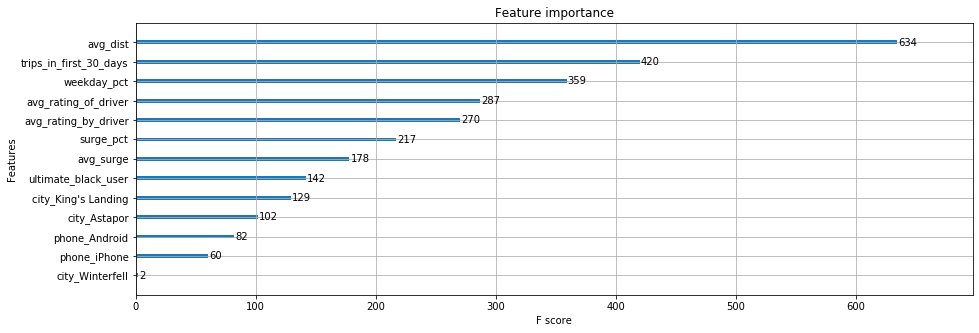

In [337]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
plot_importance(clf,ax=ax)

In [346]:
from datetime import datetime

In [349]:
df['active'] = df['last_trip_date'].apply(lambda x: x > datetime.strptime('2014-06-01','%Y-%m-%d'))

In [263]:
df[['avg_dist','active']].groupby('active').mean()

,avg_dist
active,
False,6.188478
True,5.118977


In [264]:
df[['trips_in_first_30_days','active']].groupby('active').mean()

,trips_in_first_30_days
active,
False,1.659167
True,3.349590


In [265]:
df[['weekday_pct','active']].groupby('active').mean()

,weekday_pct
active,
False,60.181597
True,62.214604


In [266]:
df[['avg_rating_of_driver','active']].groupby('active').mean()

,avg_rating_of_driver
active,
False,4.607018
True,4.593364


In [267]:
df[['surge_pct','active']].groupby('active').mean()

,surge_pct
active,
False,8.688548
True,9.128165


In [268]:
df[['avg_rating_by_driver','active']].groupby('active').mean()

,avg_rating_by_driver
active,
False,4.786876
True,4.763121


In [351]:
df[['active_time','active']].groupby('active').mean()

,active_time
active,
False,56.486115
True,155.623157


In [352]:
df1 = df.loc[df['last_trip_date'] < datetime.strptime('2014-02-01','%Y-%m-%d') ]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10147 entries, 2 to 49998
Data columns (total 14 columns):
city                      10147 non-null object
trips_in_first_30_days    10147 non-null int64
signup_date               10147 non-null datetime64[ns]
avg_rating_of_driver      7502 non-null float64
avg_surge                 10147 non-null float64
last_trip_date            10147 non-null datetime64[ns]
phone                     10017 non-null object
surge_pct                 10147 non-null float64
ultimate_black_user       10147 non-null bool
weekday_pct               10147 non-null float64
avg_dist                  10147 non-null float64
avg_rating_by_driver      10072 non-null float64
active_time               10147 non-null int64
active                    10147 non-null bool
dtypes: bool(2), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 1.0+ MB


In [366]:
for col in df1.columns:
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
        print(col,':',df1[col].mean())


trips_in_first_30_days : 1.7101606386123978
avg_rating_of_driver : 4.63332444681418
avg_surge : 1.078924805361188
surge_pct : 8.926273775500155
weekday_pct : 59.99970434611221
avg_dist : 6.8165487336158535
avg_rating_by_driver : 4.806602462271648
active_time : 2.891002266679807


In [368]:
for col in df.columns:
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
        print(col,':',df[col].mean())


trips_in_first_30_days : 2.2782
avg_rating_of_driver : 4.6015592912744685
avg_surge : 1.0747637999999744
surge_pct : 8.849535999999706
weekday_pct : 60.926083999999406
avg_dist : 5.796826599999984
avg_rating_by_driver : 4.778158195947439
active_time : 92.7901


# Part2

In [66]:
login = pd.read_json('logins.json')
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [67]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [68]:
login['count'] = [1 for i in range(login.shape[0])]
login.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [82]:
time = login.set_index('login_time')
time.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [83]:
time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
count    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


Text(0, 0.5, 'count')

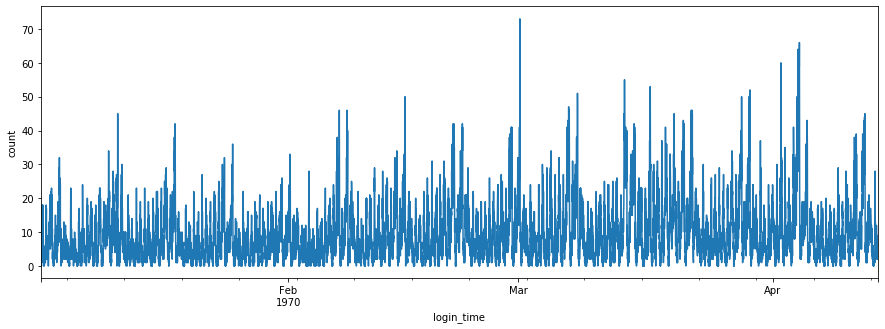

In [99]:
# three month view
counts = time['count'].resample('15min').sum()

_ = plt.figure(figsize = (15,5))
_ = counts.plot()
plt.ylabel('count')

(1440, 46080)

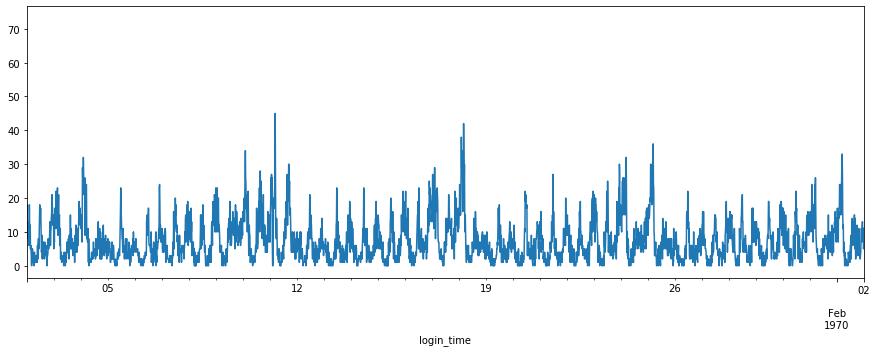

In [194]:
# one month view
_ = plt.figure(figsize = (15,5))
counts.plot()
plt.xlim(['1970-01-02','1970-02-02'])

(1440, 11520)

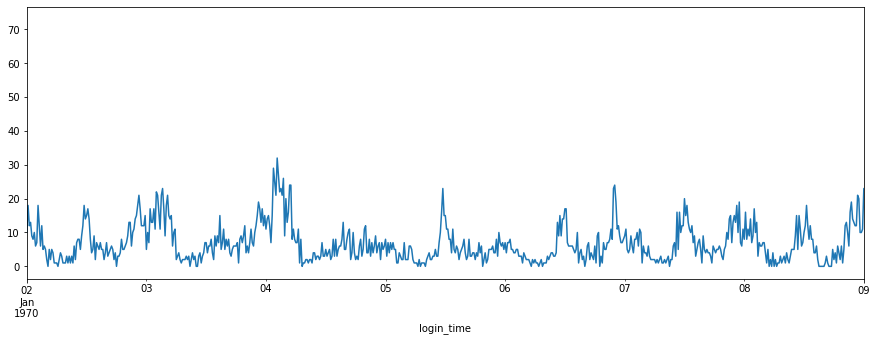

In [202]:
# one week view
_ = plt.figure(figsize = (15,5))
counts.plot()c
plt.xlim(['1970-01-02 00:00:00','1970-01-09 00:00:00'])

(5770, 10090)

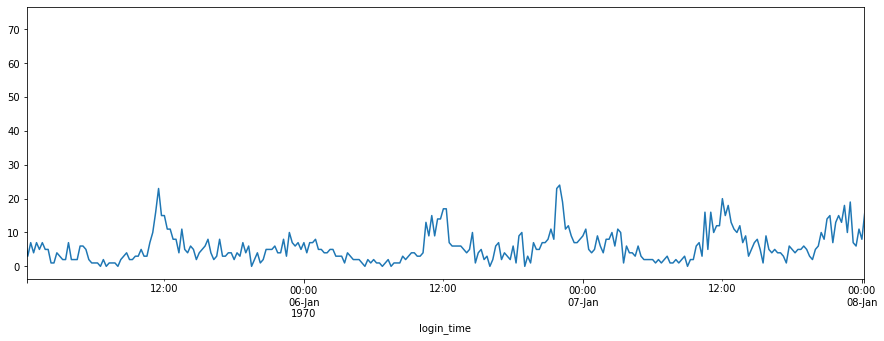

In [342]:
# one day view
_ = plt.figure(figsize = (15,5))
counts.plot()

plt.xlim(['1970-01-05 00:10','1970-01-08 00:10'])

Text(0, 0.5, 'frequency')

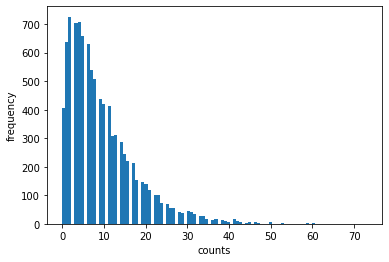

In [210]:
_ = plt.hist(counts.values,bins=100)
plt.xlabel('counts')
plt.ylabel('frequency')